# Pandas (Panel Datas)
--------

## > DataFrame 단일 값 추출엔 at, iat

In [230]:
import numpy as np
import pandas as pd

In [231]:
nba = pd.read_csv("datas/nba.csv", index_col="Name")
nba.nlargest(1, columns=["Salary"])

,Team,Position,Birthday,Salary
Name,,,,
Stephen Curry,Golden State Warriors,PG,3/14/88,40231758


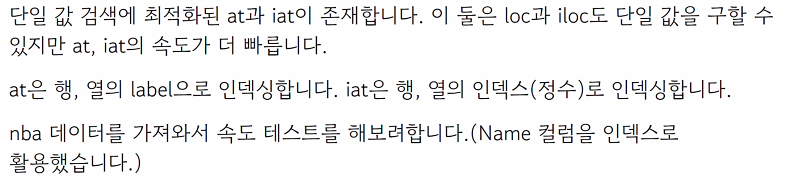

In [232]:
%%timeit
nba.at["Stephen Curry", "Birthday"]

3.76 µs ± 104 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [233]:
%%timeit
nba.loc["Stephen Curry", "Birthday"]

6.78 µs ± 230 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [234]:
%%timeit
nba.iat[263, 1]

11.4 µs ± 247 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [235]:
%%timeit
nba.iloc[263, 1]

14.8 µs ± 363 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## > Series에 loc, iloc, at, iat

In [237]:
nba.Salary.loc["Damian Lillard"]

29802321

In [238]:
nba.Salary.at["Damian Lillard"]

29802321

In [239]:
nba.Salary.iloc[234]

2033160

In [240]:
nba.Salary.iat[234]

2033160

## > DataFrame columns 값 변경하기

In [27]:
# column 속성에 리스트 값으로 재할당하면 해당 DataFrame의 columns를 변경할 수 있음
# 단, 재할당할 리스트의 크기는 columns 속성의 크기와 동일해야함
nba.columns

Index(['Team', 'Position', 'Date of Birth', 'Pay'], dtype='object')

In [243]:
nba.columns = ['Team', 'Position', 'Date of Birth', 'Pay']

In [245]:
nba.head(1)

,Team,Position,Date of Birth,Pay
Name,,,,
Shake Milton,Philadelphia 76ers,SG,9/26/96,1445697


In [248]:
nba.rename(columns={"Date of Birth": "Birthday", "Pay": "Salary"})

,Team,Position,Birthday,Salary
Name,,,,
Shake Milton,Philadelphia 76ers,SG,9/26/96,1445697
Christian Wood,Detroit Pistons,PF,9/27/95,1645357
PJ Washington,Charlotte Hornets,PF,8/23/98,3831840
Derrick Rose,Detroit Pistons,PG,10/4/88,7317074
Marial Shayok,Philadelphia 76ers,G,7/26/95,79568
...,...,...,...,...
Austin Rivers,Houston Rockets,PG,8/1/92,2174310
Harry Giles,Sacramento Kings,PF,4/22/98,2578800
Robin Lopez,Milwaukee Bucks,C,4/1/88,4767000


In [30]:
# rename() 메서드를 활용해서 변경할 수 있다.
# 단 rename은 기본적으로 inplace 키워드 인수 값이 False이므로, 재할당하거나 inplace=True로
# 메서드 호출을 해주어야 한다.
nba.rename(columns={"Date of Birth": "Birthday",
                    "Pay": "Salary"})

,Team,Position,Birthday,Salary
Name,,,,
Shake Milton,Philadelphia 76ers,SG,9/26/96,1445697
Christian Wood,Detroit Pistons,PF,9/27/95,1645357
PJ Washington,Charlotte Hornets,PF,8/23/98,3831840
Derrick Rose,Detroit Pistons,PG,10/4/88,7317074
Marial Shayok,Philadelphia 76ers,G,7/26/95,79568
...,...,...,...,...
Austin Rivers,Houston Rockets,PG,8/1/92,2174310
Harry Giles,Sacramento Kings,PF,4/22/98,2578800
Robin Lopez,Milwaukee Bucks,C,4/1/88,4767000


## > DataFrame index 값 변경하기

In [249]:
nba.loc["Giannis Antetokounmpo"]

Team             Milwaukee Bucks
Position                      PF
Date of Birth            12/6/94
Pay                     25842697
Name: Giannis Antetokounmpo, dtype: object

In [250]:
nba = nba.rename(index={"Giannis Antetokounmpo" : "Greek Freak"})

In [251]:
nba.loc["Greek Freak"]

Team             Milwaukee Bucks
Position                      PF
Date of Birth            12/6/94
Pay                     25842697
Name: Greek Freak, dtype: object

In [268]:
# 연습문제1
nfl = pd.read_csv("datas/nfl.csv", 
                  parse_dates=["Birthday"],
                  index_col="Name")
nfl

,Team,Position,Birthday,Salary
Name,,,,
Tremon Smith,Philadelphia Eagles,RB,1996-07-20,570000
Shawn Williams,Cincinnati Bengals,SS,1991-05-13,3500000
Adam Butler,New England Patriots,DT,1994-04-12,645000
Derek Wolfe,Denver Broncos,DE,1990-02-24,8000000
Jake Ryan,Jacksonville Jaguars,OLB,1992-02-27,1000000
...,...,...,...,...
Bashaud Breeland,Kansas City Chiefs,CB,1992-01-30,805000
Craig James,Philadelphia Eagles,CB,1996-04-29,570000
Jonotthan Harrison,New York Jets,C,1991-08-25,1500000


In [269]:
# 연습문제2
nfl.Team.value_counts()

New York Jets           58
Kansas City Chiefs      56
Washington Redskins     56
New Orleans Saints      55
San Francisco 49Ers     55
Denver Broncos          54
Minnesota Vikings       54
Los Angeles Chargers    54
Seattle Seahawks        53
Dallas Cowboys          53
Buffalo Bills           53
Atlanta Falcons         53
Detroit Lions           53
Chicago Bears           53
Los Angeles Rams        52
New York Giants         52
Philadelphia Eagles     52
Houston Texans          52
Arizona Cardinals       51
Cincinnati Bengals      51
Green Bay Packers       51
Oakland Raiders         51
Jacksonville Jaguars    50
Cleveland Browns        49
Miami Dolphins          49
Indianapolis Colts      49
Carolina Panthers       49
New England Patriots    49
Baltimore Ravens        48
Pittsburgh Steelers     47
Tampa Bay Buccaneers    47
Tennessee Titans        46
Name: Team, dtype: int64

In [270]:
# 연습문제3
nfl.nlargest(5, columns=["Salary"])

,Team,Position,Birthday,Salary
Name,,,,
Kirk Cousins,Minnesota Vikings,QB,1988-08-19,27500000
Marcus Mariota,Tennessee Titans,QB,1993-10-30,20922000
Jameis Winston,Tampa Bay Buccaneers,QB,1994-01-06,20922000
Derek Carr,Oakland Raiders,QB,1991-03-28,19900000
Jimmy Garoppolo,San Francisco 49Ers,QB,1991-11-02,17200000


In [271]:
# 연습문제 4
nfl.sort_values(by = ["Team", "Salary"], ascending=[True, False])

,Team,Position,Birthday,Salary
Name,,,,
Chandler Jones,Arizona Cardinals,OLB,1990-02-27,16500000
Patrick Peterson,Arizona Cardinals,CB,1990-07-11,11000000
Larry Fitzgerald,Arizona Cardinals,WR,1983-08-31,11000000
David Johnson,Arizona Cardinals,RB,1991-12-16,5700000
Justin Pugh,Arizona Cardinals,G,1990-08-15,5000000
...,...,...,...,...
Ross Pierschbacher,Washington Redskins,C,1995-05-05,495000
Kelvin Harmon,Washington Redskins,WR,1996-12-15,495000
Wes Martin,Washington Redskins,G,1996-05-09,495000


In [280]:
# 연습문제 5

nfl.loc[nfl['Team']=="New York Jets"].nsmallest(1, columns=["Birthday"])

,Team,Position,Birthday,Salary
Name,,,,
Ryan Kalil,New York Jets,C,1985-03-29,2400000


## > Series apply() 메서드

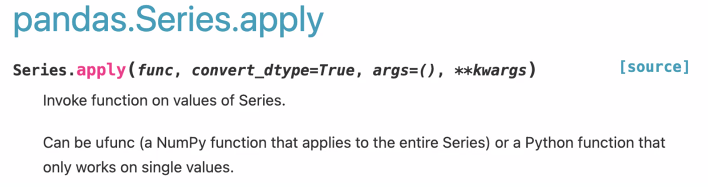

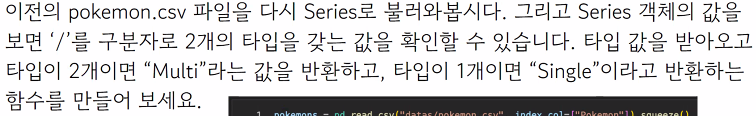

In [38]:
pokemons = pd.read_csv("datas/pokemon.csv", index_col=["Pokemon"]).squeeze()
pokemons

Pokemon
Bulbasaur      Grass / Poison
Ivysaur        Grass / Poison
Venusaur       Grass / Poison
Charmander               Fire
Charmeleon               Fire
                    ...      
Stakataka        Rock / Steel
Blacephalon      Fire / Ghost
Zeraora              Electric
Meltan                  Steel
Melmetal                Steel
Name: Type, Length: 809, dtype: object

In [39]:
def single_or_multi(type):
    if "/" in type:
        return "Multi"
    return "Single"

In [40]:
# apply 메서드로 위 함수 적용
pokemons.apply(single_or_multi)

Pokemon
Bulbasaur       Multi
Ivysaur         Multi
Venusaur        Multi
Charmander     Single
Charmeleon     Single
                ...  
Stakataka       Multi
Blacephalon     Multi
Zeraora        Single
Meltan         Single
Melmetal       Single
Name: Type, Length: 809, dtype: object

In [41]:
# 연습문제 5
pokemons.apply(single_or_multi).value_counts()

Multi     405
Single    404
Name: Type, dtype: int64

## > DataFrame apply() 메서드

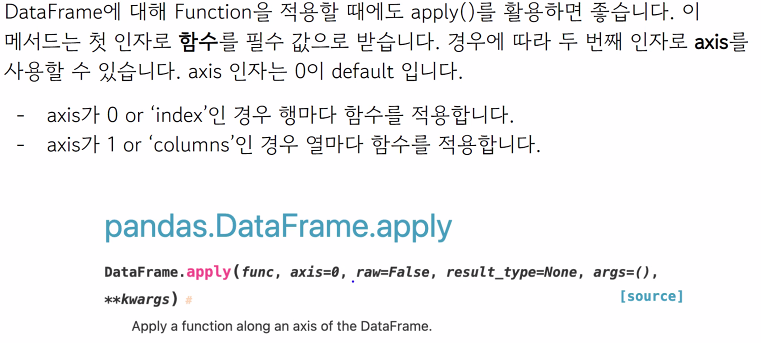

In [42]:
df = pd.DataFrame([[4, 9]] * 3, columns=["A", "B"])
df

,A,B
0,4,9
1,4,9
2,4,9


In [43]:
# 각 요소마다 적용되는 universal functions (ufunc)
df.apply(np.sqrt)

,A,B
0,2.0,3.0
1,2.0,3.0
2,2.0,3.0


In [44]:
# 축의 방향에 따라 연산이되는 차원 축소 함수:sum 은 축의 값을 줘야한다.
df.apply(np.sum, axis="index")

A    12
B    27
dtype: int64

In [45]:
df.apply(lambda x: [1, 2], axis=0)

,A,B
0,1,1
1,2,2


In [46]:
df.apply(lambda x: [1, 2], axis=1)

0    [1, 2]
1    [1, 2]
2    [1, 2]
dtype: object

In [47]:
# result_type을 통해 리스트를 하나의 값으로 보지않고 리스트 요소마다 column으로 인식 확장
df.apply(lambda x: [1, 2], axis=1, result_type='expand')

,0,1
0,1,2
1,1,2
2,1,2


In [48]:
df.apply(lambda x: pd.Series([1, 2], index=["foo", "bar"]), axis=1)

,foo,bar
0,1,2
1,1,2
2,1,2


In [51]:
# broadcast -> 기존의 shape과 함수 return된 값의  shape의 크기가 동일하다.
df.apply(lambda x: [1, 2], axis=1, result_type='broadcast')

,A,B
0,1,2
1,1,2
2,1,2


In [52]:
# broadcast 불가
df.apply(lambda x: [1, 2, 3], axis=1, result_type='broadcast')

ValueError: cannot broadcast result

In [53]:
df3 = pd.DataFrame({'A': [1, 3, 4, 3, 4],
                    'B': [2, 3, 1, 2, 3],
                    'C': [1, 5, 2, 4, 4]})
df3

,A,B,C
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [54]:
# 행간의 연산
df3.apply(lambda x: x.max() - x.min())

A    3
B    2
C    4
dtype: int64

In [55]:
# 열간의 연산
df3.apply(lambda x: x.max() - x.min(), axis=1)

0    1
1    2
2    3
3    2
4    1
dtype: int64

In [56]:
# ()를 사용하는 것은 함수를 호출하는것으로 아래의 경우 함수만 가져온다
df3.apply(pd.value_counts)

,A,B,C
1,1.0,1.0,1.0
2,NaN,2.0,1.0
3,2.0,2.0,NaN
4,2.0,NaN,2.0
5,NaN,NaN,1.0


In [57]:
import seaborn as sns
titanic = sns.load_dataset("titanic")

In [58]:
titanic["adult/child"] = titanic.apply(lambda r: "adult" if r.age >= 20 else "child", axis=1)

In [59]:
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,adult/child
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True,adult
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True,child
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False,child
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True,adult
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True,adult


In [61]:
# 연습문제
titanic['category1'] = titanic.apply(lambda x: x['sex'] if x['age'] >= 20 else "child", axis=1)
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,adult/child,category1
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True,adult,male
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True,child,child
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False,child,child
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True,adult,male
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True,adult,male


## > DataFrame fillna() 메서드

In [62]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                   [3, 4, np.nan, 1],
                   [np.nan, np.nan, np.nan, np.nan],
                   [np.nan, 3, np.nan, 4]],
                  columns = list("ABCD"))
df

,A,B,C,D
0,NaN,2.0,NaN,0.0
1,3.0,4.0,NaN,1.0
2,NaN,NaN,NaN,NaN
3,NaN,3.0,NaN,4.0


In [64]:
# NaN 값을 0으로 변경하기
df.fillna(0)

,A,B,C,D
0,0.0,2.0,0.0,0.0
1,3.0,4.0,0.0,1.0
2,0.0,0.0,0.0,0.0
3,0.0,3.0,0.0,4.0


In [65]:
# 해당 colum의 결측치에 넣어줄 값
values = {"A": 0, "B": 1, "C": 2, "D": 3}
df.fillna(value=values)

,A,B,C,D
0,0.0,2.0,2.0,0.0
1,3.0,4.0,2.0,1.0
2,0.0,1.0,2.0,3.0
3,0.0,3.0,2.0,4.0


In [66]:
# 결측치에 들어갈 값을 제한
values = {"A": 0, "B": 1, "C": 2, "D": 3}
df.fillna(value=values, limit=1)

,A,B,C,D
0,0.0,2.0,2.0,0.0
1,3.0,4.0,NaN,1.0
2,NaN,1.0,NaN,3.0
3,NaN,3.0,NaN,4.0


In [79]:
# DataFrame에 value를 전달하여 NaN값을 배제
df2 = pd.DataFrame(np.zeros((3, 4)), columns=list('ABCE'))
df.fillna(df2)

,A,B,C,D
0,0.0,2.0,0.0,0.0
1,3.0,4.0,0.0,1.0
2,0.0,0.0,0.0,NaN
3,NaN,3.0,NaN,4.0


In [81]:
# 연습문제 6
# titanic.count()
# titanic[titanic['age'].isna()]

In [102]:
values1 = {'age': round(titanic.age.mean(), 1)}
titanic.fillna(value=values1, inplace=True)

In [103]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,adult/child,category1
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,adult,male
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,adult,female
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,adult,female
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult,female
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,adult,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,adult,male
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,child,child
888,0,3,female,29.7,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,child,child
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,adult,male


## > DataFrame astype() 메서드

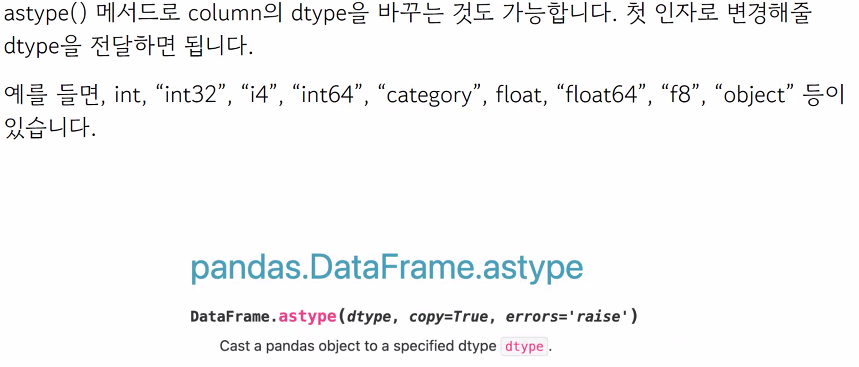

In [104]:
d = {'col1': [1, 2], 'col2': [3, 4] }
df = pd.DataFrame(data=d)
df.dtypes

col1    int64
col2    int64
dtype: object

In [105]:
df.astype('int32').dtypes

col1    int32
col2    int32
dtype: object

In [110]:
employee = pd.read_csv("datas/employees.csv", parse_dates=["Start Date"], index_col = "First Name")
employee

,Gender,Start Date,Salary,Mgmt,Team
First Name,,,,,
Douglas,Male,1993-08-06,NaN,True,Marketing
Thomas,Male,1996-03-31,61933.0,True,NaN
Maria,Female,NaT,130590.0,False,Finance
Jerry,NaN,2005-03-04,138705.0,True,Finance
Larry,Male,1998-01-24,101004.0,True,IT
...,...,...,...,...,...
Phillip,Male,1984-01-31,42392.0,False,Finance
Russell,Male,2013-05-20,96914.0,False,Product
Larry,Male,2013-04-20,60500.0,False,Business Dev


In [111]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1001 entries, Douglas to nan
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Gender      854 non-null    object        
 1   Start Date  999 non-null    datetime64[ns]
 2   Salary      999 non-null    float64       
 3   Mgmt        933 non-null    object        
 4   Team        957 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 46.9+ KB


In [117]:
employee.Mgmt.value_counts()

True     468
False    465
Name: Mgmt, dtype: int64

In [119]:
# type을 object에서 bool로 변경해줌으로써 메모리 용량 최적화
employee.Mgmt = employee.Mgmt.astype(bool)
employee.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1001 entries, Douglas to nan
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Gender      854 non-null    object        
 1   Start Date  999 non-null    datetime64[ns]
 2   Salary      999 non-null    float64       
 3   Mgmt        1001 non-null   bool          
 4   Team        957 non-null    object        
dtypes: bool(1), datetime64[ns](1), float64(1), object(2)
memory usage: 40.1+ KB


In [132]:
# 연습문제

employee['Salary'].isna()
v = {'Salary': 0}
employee.fillna(value=v, inplace=True)
employee.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1001 entries, Douglas to nan
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Gender      854 non-null    object        
 1   Start Date  999 non-null    datetime64[ns]
 2   Salary      1001 non-null   float64       
 3   Mgmt        1001 non-null   bool          
 4   Team        957 non-null    object        
dtypes: bool(1), datetime64[ns](1), float64(1), object(2)
memory usage: 72.4+ KB


In [133]:
employee.Salary = employee.Salary.astype(int)

In [134]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1001 entries, Douglas to nan
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Gender      854 non-null    object        
 1   Start Date  999 non-null    datetime64[ns]
 2   Salary      1001 non-null   int32         
 3   Mgmt        1001 non-null   bool          
 4   Team        957 non-null    object        
dtypes: bool(1), datetime64[ns](1), int32(1), object(2)
memory usage: 68.5+ KB


In [135]:
employee.Salary = employee.Salary.fillna(0)

In [136]:
sum((employee.Salary - employee.Salary.astype(int)) > 0)

0

In [137]:
employee.Salary = employee.Salary.astype(int)
employee.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1001 entries, Douglas to nan
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Gender      854 non-null    object        
 1   Start Date  999 non-null    datetime64[ns]
 2   Salary      1001 non-null   int32         
 3   Mgmt        1001 non-null   bool          
 4   Team        957 non-null    object        
dtypes: bool(1), datetime64[ns](1), int32(1), object(2)
memory usage: 68.5+ KB


In [140]:
# 연습문제
employee.nunique()

Gender          2
Start Date    971
Salary        995
Mgmt            2
Team           10
dtype: int64

In [149]:
employee.Gender = employee.Gender.astype('category')
employee.Team = employee.Team.astype('category')
employee.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1001 entries, Douglas to nan
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Gender      854 non-null    category      
 1   Start Date  999 non-null    datetime64[ns]
 2   Salary      1001 non-null   int32         
 3   Mgmt        1001 non-null   bool          
 4   Team        957 non-null    category      
dtypes: bool(1), category(2), datetime64[ns](1), int32(1)
memory usage: 55.3+ KB


In [162]:
# 연습문제
titanic['category2'] = titanic.sex + titanic.age.astype(str)
#titanic[('age', 'category2')]

## > DataFrame 실수 값을 카테고리 값으로 변환

In [163]:
ages = [0, 2, 10, 21, 23, 37, 31, 61, 20, 41, 32, 101]

bins = [1, 20, 30, 50, 70, 100]
labels = ["미성년자", "청년", "장년", "중년", "노년"]
cats = pd.cut(ages, bins, labels=labels)
cats

[NaN, '미성년자', '미성년자', '청년', '청년', ..., '중년', '미성년자', '장년', '장년', NaN]
Length: 12
Categories (5, object): ['미성년자' < '청년' < '장년' < '중년' < '노년']

In [164]:
type(cats)

pandas.core.arrays.categorical.Categorical

In [165]:
cats.categories

Index(['미성년자', '청년', '장년', '중년', '노년'], dtype='object')

In [166]:
cats.codes

array([-1,  0,  0,  1,  1,  2,  2,  3,  0,  2,  2, -1], dtype=int8)

In [168]:
df4 = pd.DataFrame(ages, columns=["ages"])
df4["age_cat"] = pd.cut(df4.ages, bins, labels=labels)
df4

,ages,age_cat
0,0,NaN
1,2,미성년자
2,10,미성년자
3,21,청년
4,23,청년
5,37,장년
6,31,장년
7,61,중년
8,20,미성년자
9,41,장년


In [169]:
df4.dtypes

ages          int64
age_cat    category
dtype: object

In [170]:
df4["age_cat"].astype(str) + df4["ages"].astype(str)

0       nan0
1      미성년자2
2     미성년자10
3       청년21
4       청년23
5       장년37
6       장년31
7       중년61
8     미성년자20
9       장년41
10      장년32
11    nan101
dtype: object

In [171]:
data = np.random.randn(1000)
cats = pd.qcut(data, 4, labels=["Q1", "Q2", "Q3", "Q4"])
cats


['Q4', 'Q3', 'Q2', 'Q4', 'Q4', ..., 'Q2', 'Q4', 'Q3', 'Q4', 'Q2']
Length: 1000
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']

In [172]:
pd.value_counts(cats)

Q1    250
Q2    250
Q3    250
Q4    250
dtype: int64

In [196]:
# 연습문제
bins = [1, 20, 30, 50, 70, 100]
labels = ["미성년자", "청년", "장년", "중년", "노년"]

df5 = pd.DataFrame(ages, columns=["age"])
df5['age_c'] = pd.cut(df5.age, bins, labels=labels)
df5.value_counts("age_c", normalize=True)

age_c
청년      0.464082
장년      0.274800
미성년자    0.188141
중년      0.067275
노년      0.005701
dtype: float64

In [222]:
# 연습문제
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset("titanic")
titanic["age"].fillna(titanic["age"].mean(), inplace=True)

bins = [1, 20, 30, 50, 70, 100]
labels = ["미성년자", "청년", "장년", "중년", "노년"]

titanic["연령층"] = pd.cut(titanic["age"], bins, labels=labels)
titanic["category3"] = titanic.apply(lambda i : "미성년자" if i["age"] < 20 else i["연령층"]
                                     + ("남성" if i["sex"] == "male" else "여성"), axis=1)

titanic[["연령층", "age", "sex", "category3"]]

,연령층,age,sex,category3
0,청년,22.000000,male,청년남성
1,장년,38.000000,female,장년여성
2,청년,26.000000,female,청년여성
3,장년,35.000000,female,장년여성
4,장년,35.000000,male,장년남성
...,...,...,...,...
886,청년,27.000000,male,청년남성
887,미성년자,19.000000,female,미성년자
888,청년,29.699118,female,청년여성
889,청년,26.000000,male,청년남성


In [228]:
# '|'은 or 값처럼 연산하여 True / False값중 True 값을 냄
titanic[(titanic["age"] < 1) | (titanic["age"] > 100)][["연령층", "age", "sex", "category3"]]

,연령층,age,sex,category3
78,NaN,0.83,male,미성년자
305,NaN,0.92,male,미성년자
469,NaN,0.75,female,미성년자
644,NaN,0.75,female,미성년자
755,NaN,0.67,male,미성년자
803,NaN,0.42,male,미성년자
831,NaN,0.83,male,미성년자
